# 1.1决策树概述
决策树是一种非参数的有监督学习算法，从一系列特征和标签中总结决策规则，并用树形图来呈现规则，解决分类和回归问题。

## 1.2优点
* 使用各种数据，在解决各种问题时都有良好表现
* 算法简单容易理解

## 1.3算法过程
1. 根节点:最初的问题，没有进边有出边
2. 中间节点: 过程，有进边也有出边
3. 叶子节点: 结果标签，有进边没有出边

## 1.4决策树的核心问题
1. 如何从数据表中找出最佳节点和最佳分支
2. 如何让决策树停止生长，防止过拟合

### 1.4.1

### 1.4.2

----
# 2sklearn中的决策树
## 模块sklearn.tree
* tree.DecisionTreeClassifier  分类树
* tree.DecisionTreeRegressor  回归树
* tree.export_graphviz  将生成的决策树到处为DOT格式，画图专用
* tree.ExtraTreeClassifier  高随机分类树
* tree.ExtraTreeRegressor  高随机回归树

## 2.1sklearn中的建模流程
1. 实例化--建立评估模型对象
2. 通过训练接口训练模型
3. 通过模型接口提取需要的信息

```python
from sklearn import tree  # 导入模块

clf = tree.DecisionTreeClassifier()  # 实例化
clf = clf.fit(x_train, y_tran)       # 训啦数据，x_train训练集数据, y_tran训练集标签
result = clf.score(x_test, y_test)   # 导入测试集，提取需要的信息，x_test训练集数据, y_test训练集标签
```

## 2.2重要参数

```
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
```

### 2.2.1criterion
决策树的问题之一是找出最佳的分类方法，衡量分类是不是“最佳”的指标叫做--`不纯度`。不纯度越低效果越好。现在决策树算法在分支上的核心大多是围绕不纯度指标优化上。

不纯度围绕节点来计算，每一个节点都会有一个不纯度，子节点的不纯度低于父节点的不纯度，也就是说叶子节点的不纯度是最低的。

`criterion`参数就是决定不纯度的计算方法。sklearn提供两个不纯度计算方法:
1. `entropy`,使用**信息熵(Entropy)**
2. `gini`,使用**基尼系数(Gini impurtu)**

$$Entropy(t) = -\sum_{i=0}^{c-1}p(i|t)log_{2}p(i|t)$$

$$Gini(t) = 1 - \sum_{i=0}^{c-1}p(i|t)^{2}$$

> t: 给定节点

> i: 任意分类

> $p(i|t)$i标签在t节点上的比例

In [2]:
from sklearn import tree
from sklearn.datasets import load_wine  # sklearn自带的数据模块
from sklearn.model_selection import train_test_split  # 分测试集和训练集的类

导入数据，并观察数据

In [2]:
wine = load_wine()

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
wine.data.shape

(178, 13)

In [6]:
import pandas as pd

In [7]:
pd.concat([pd.DataFrame(wine.data), pd.DataFrame(wine.target)], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

将数据切分，分为测试集合训练集

In [10]:
x_train,x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)  # 切分，30%为测试集, 注意顺序 x,x--y,y

In [11]:
x_train.shape

(124, 13)

In [12]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(x_train, y_train)
result = clf.score(x_test, y_test)  # 分会预测精确度
result

0.9074074074074074

画树

In [13]:
import graphviz

In [14]:
dot_data = tree.export_graphviz(
    clf,  # 训练好的模型
    feature_names=wine.feature_names,  # 特征名字
    class_names=wine.target_names,  # 标签名字
    filled=True,
    rounded=True,
    out_file=None
)

In [15]:
graph = graphviz.Source(dot_data)

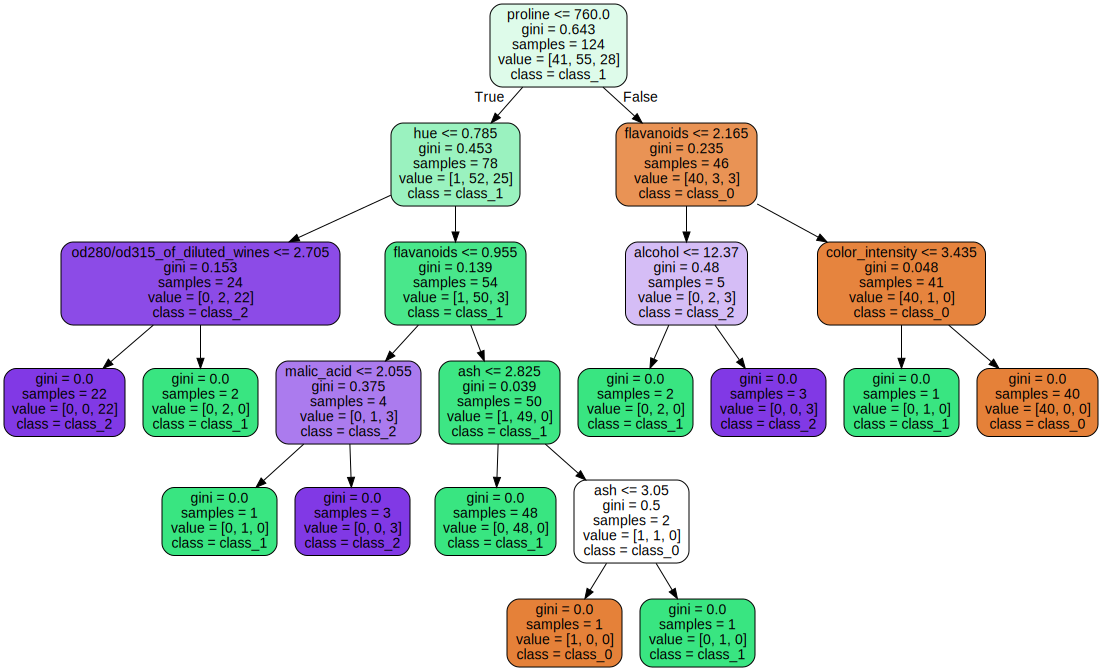

In [16]:
graph

In [45]:
clf.feature_importances_  # 每个特征的重要性

array([0.        , 0.        , 0.02386535, 0.        , 0.        ,
       0.        , 0.40279144, 0.        , 0.        , 0.39269272,
       0.        , 0.        , 0.18065049])

In [47]:
[*zip(wine.feature_names, clf.feature_importances_)]  # 查看每个特征的重要性

[('alcohol', 0.0),
 ('malic_acid', 0.0),
 ('ash', 0.023865346257479783),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.0),
 ('total_phenols', 0.0),
 ('flavanoids', 0.40279144419391294),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.3926927221079439),
 ('hue', 0.0),
 ('od280/od315_of_diluted_wines', 0.0),
 ('proline', 0.18065048744066334)]

In [56]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=30)  # 设定随机种子，固定随机模式，使模型每次运行得到相同的得分
clf = clf.fit(x_train, y_train)
result = clf.score(x_test, y_test)  # 分会预测精确度
result

0.9629629629629629

In [60]:
clf = tree.DecisionTreeClassifier(criterion='gini', 
                                  random_state=30,   # 设定随机种子，固定随机模式，使模型每次运行得到相同的得分
                                  splitter='random')  # 也是控制随机性的参数random不考虑参数的重要性，完全随机，特征较多可使用防止过拟合
clf = clf.fit(x_train, y_train)
result = clf.score(x_test, y_test)  # 分会预测精确度
result

0.9814814814814815

### 2.2.2减枝参数
在不见限制的情况下决策树会生长到不纯度指标最优，或没有更多特征可用为止，这样通常会过拟合--训练集表现很好，测试集表现不好

In [17]:
# 查看训练集得分
score_train = clf.score(x_train, y_train)
score_train

1.0

目前没有过拟合，如果发生测试集得分高训练集得分第说明过拟合

为了提升决策树的泛化性，需要进行剪枝，**剪枝策略对决策树的影响巨大，正确的剪枝是优化决策树的核心算法**

* max_depth
限制数的最大深度，超过深度的全部减掉。对**高维度低样本量**时很有效，决策树每生长一层，对样本量的需求就会翻一倍。
在集成算法中也经常使用。一般从3开始使用
* min_samples_leaf & min_samples_split
    * 限定min_samples_leaf值，一个节点在分支后必须包含至少min_samples_leaf个训练样本，否则不会继续分支，或者每个节点都向着满足min_samples_leaf各样本数量的方向发生。
        * 通常与max_depth配合使用
        * 如果设置太小就会过拟合，如果太大会影响模型学习数据，通常从min_samples_leaf=5开始使用
        * 如果叶节点的样本量变化很大，可以输入浮点数
        * 可以保证每个叶子的最小尺寸，在回归问题中避免低方差
        * 对于类别不多的分类，=1通常是最佳选择
    * min_samples_split限定，一个节点必须包含min_samples_split个样本，这样节点才可以分支，否则不会分支

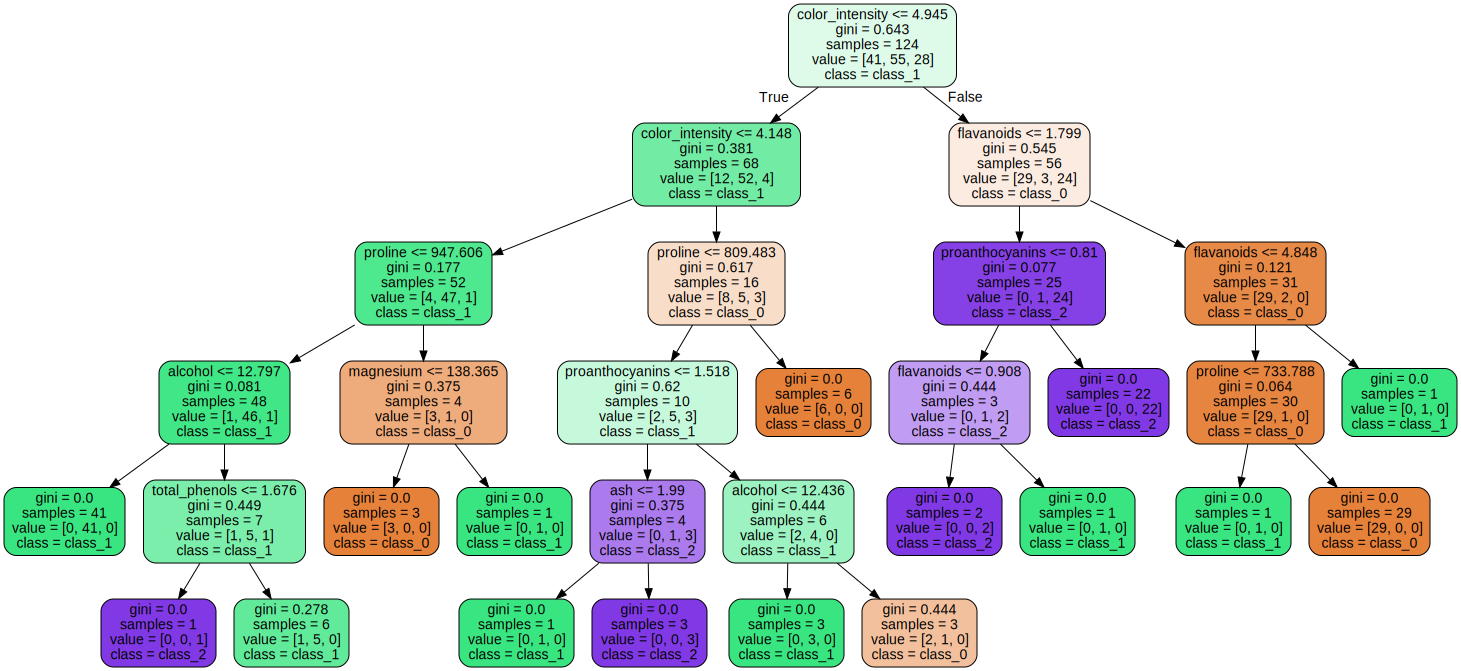

In [63]:
clf  = tree.DecisionTreeClassifier(criterion='gini',
                                  random_state=30,
                                  splitter='random',
                                  max_depth=5,
                                  min_samples_leaf=1,
#                                   min_samples_split=1
                                  )
clf = clf.fit(x_train, y_train)
dot_data = tree.export_graphviz(clf,
                               feature_names=wine.feature_names,
                               class_names=wine.target_names,
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
graph

In [64]:
result = clf.score(x_test, y_test)

In [65]:
result

0.9629629629629629

* max_features&min_impurity_decrease
    * max_features限制分支时考虑分支的个数，超过这个个数全部会被舍弃
        * 高维数据可以防止过拟合，不过通常使用降维算法
    * min_impurity_decrease限制信息增益的大小，信息增益小于某个值就不会再发生。因为信息增益越大说明对树的贡献越大

### 2.2.3确定最优剪枝参数
使用超参数学习曲线。
> 超参数学习曲线是一条以超参数的取值为横坐标，模型的度量指标为纵坐标，用来衡量不同超参数取值下模型的表现的线

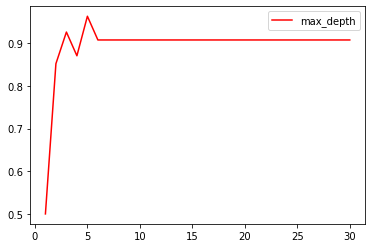

In [71]:
import matplotlib.pyplot as plt

test = []
for i in range(30):
    clf  = tree.DecisionTreeClassifier(criterion='gini',
                                      random_state=30,
                                      splitter='random',
                                      max_depth=i+1,
#                                       min_samples_leaf=1,
                                      )
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)
plt.plot(range(1,31), test, color='red', label='max_depth')
plt.legend()
plt.show()

### 2.2.4目标权重参数
* class_weight&min_weight_fraction_leaf
    * class_weight完成标签平衡的参数，有些数据天生不平衡，比如银行违约。class_weight会给定少数类更大的权重，默认None
    * min_weight_fraction_leaf,当设定了class_weight参数，就要配合min_weight_fraction_leaf进行剪枝

### 2.3.1重要属性和接口

In [73]:
clf.apply(x_test)  # 返回每个样本在叶子节点的索引

array([31,  6, 29, 23, 36, 29, 29, 36, 36, 28, 19,  4, 29, 22,  4,  4,  4,
       29, 27, 36, 29, 14,  4, 13, 29, 29,  4, 11, 23, 36, 29, 36,  4,  4,
        4,  4,  4, 36, 29,  4, 36, 36, 31,  4, 36, 29, 21, 29,  4, 19, 36,
        4, 23,  4], dtype=int64)

In [74]:
clf.predict(x_test)  # 返回每个测试样本的分类/结果

array([2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1,
       0, 2, 1, 2, 1, 2, 0, 1, 0, 1])